In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data

df = pd.read_csv('hearing_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<AxesSubplot:xlabel='age', ylabel='physical_score'>

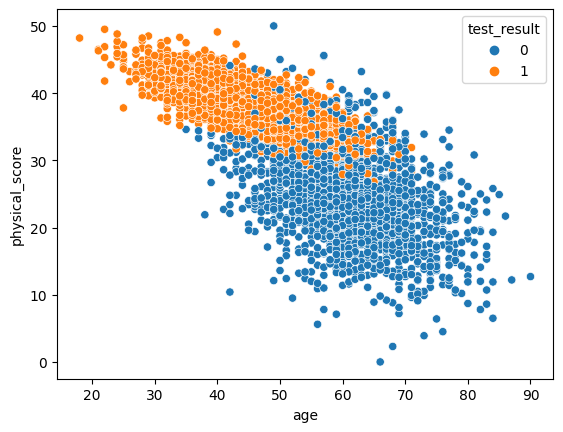

In [4]:
sns.scatterplot(x='age',y='physical_score',data=df,hue = 'test_result')

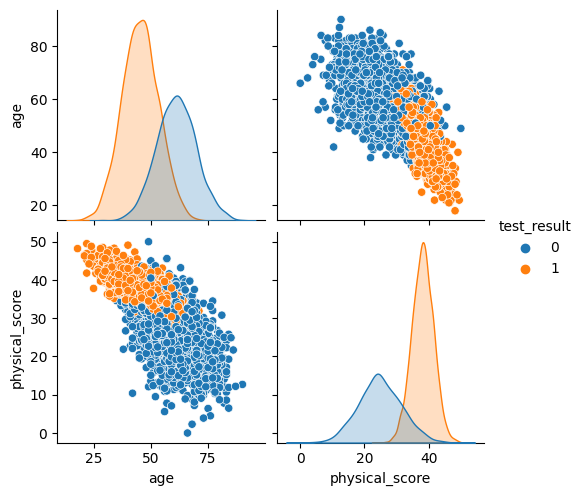

In [5]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:xlabel='test_result', ylabel='count'>

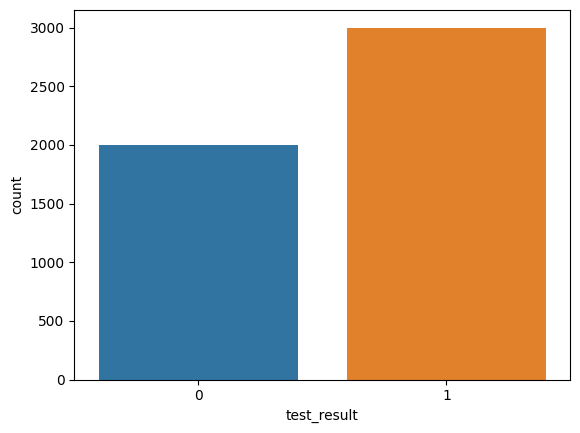

In [6]:
sns.countplot(data=df,x='test_result')

In [7]:
# Find the correlation

for column in df.columns:
    corr = np.corrcoef(df['test_result'],df[column])
    print(f"Correlation between test result and {column} = {corr[0][1]}")

Correlation between test result and age = -0.6831706796301833
Correlation between test result and physical_score = 0.7927158178562401
Correlation between test result and test_result = 0.9999999999999999


In [9]:
# decide input and output variable

x = df.drop('test_result',axis = 1)
y = df['test_result']

In [10]:
# split the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [11]:
# KNN(K Nearest Neighbours)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# create a model
model = KNeighborsClassifier(n_neighbors=5)

# train the model
model.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_prediction= model.predict(x_test)

In [15]:
print(y_prediction)

[1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 

In [16]:
# Model Evaluation Parameters 

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,plot_confusion_matrix

In [18]:
cm = confusion_matrix(y_test,y_prediction)

In [19]:
print(cm)

[[353  51]
 [ 22 574]]


In [20]:
accuracy = accuracy_score(y_test,y_prediction)
print(f"Accuracy = {accuracy*100}")

Accuracy = 92.7


In [22]:
f1score = f1_score(y_test,y_prediction)
print(f"F1 Score = {f1score}")

F1 Score = 0.9402129402129402


In [23]:
recall = recall_score(y_test,y_prediction)
print(f"Recall Score = {recall}")

Recall Score = 0.9630872483221476


C:\Users\sunbeam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


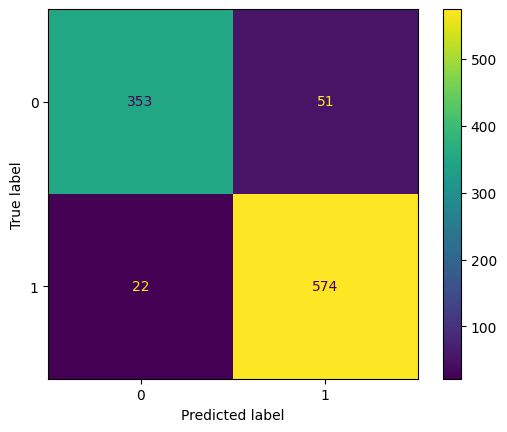

In [24]:
plot_confusion_matrix(model,x_test,y_test)

In [25]:
# classification Report
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       404
           1       0.92      0.96      0.94       596

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



In [29]:
# Result Visualization

Text(0, 0.5, 'Physical Score')

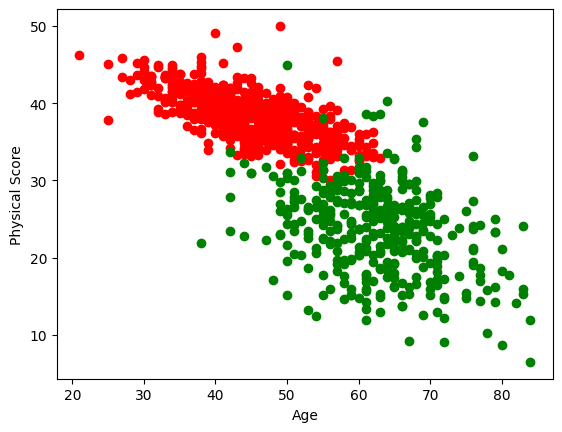

In [33]:
plt.scatter(x_test['age'][y_prediction==1],x_test['physical_score']
            [y_prediction==1],color="red")

plt.scatter(x_test['age'][y_prediction==0],x_test['physical_score']
            [y_prediction==0],color="green")

plt.xlabel('Age')
plt.ylabel('Physical Score')


Text(0, 0.5, 'Physical Score')

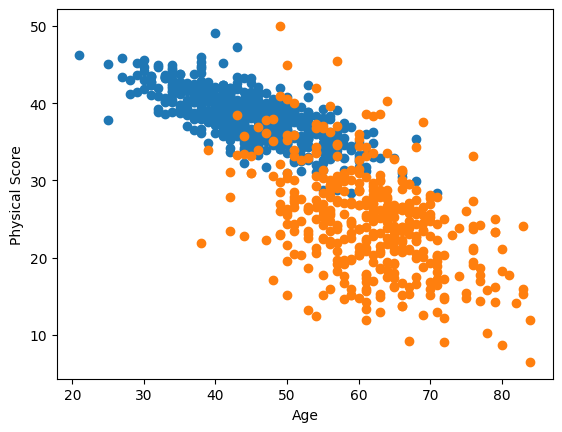

In [31]:
plt.scatter(x_test['age'][y_test==1],x_test['physical_score']
            [y_test==1])

plt.scatter(x_test['age'][y_test==0],x_test['physical_score']
            [y_test==0])

plt.xlabel('Age')
plt.ylabel('Physical Score')